In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
# nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [2]:
df = pd.read_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv")
df

,racism,sexism,other,none,label,tweet,category,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0.0,1.0,0.0,0.0,2.0,s to other Halloween Hoes or else you a TRICK ...,sexism,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,2.0,the fbi has finally id d the zodiac killer wha...,sexism,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,God must have a plan for me to have someone ou...,racism,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0,2.0,Fuckin that bitch from the back and hearing he...,sexism,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,0.0,2.0,bitch cunt gay slut,sexism,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9711,0.0,0.0,1.0,0.0,3.0,Power of hijab,other,NaN,NaN,NaN,NaN
9712,0.0,0.0,1.0,0.0,3.0,"When did saffron ""stoles"" become integral to t...",other,NaN,NaN,NaN,NaN
9713,0.0,0.0,1.0,0.0,3.0,Has Hijab protected women in the Middle East f...,other,NaN,NaN,NaN,NaN
9714,0.0,0.0,0.0,1.0,0.0,We could venture the overwhelming nature of ou...,none,NaN,NaN,NaN,NaN


In [3]:
df.shape

(9716, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9716 entries, 0 to 9715
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   racism       9716 non-null   float64
 1   sexism       9716 non-null   float64
 2   other        9716 non-null   float64
 3   none         9716 non-null   float64
 4   label        9716 non-null   float64
 5   tweet        9716 non-null   object 
 6   category     9716 non-null   object 
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  1 non-null      object 
dtypes: float64(8), object(3)
memory usage: 835.1+ KB


In [5]:
df['racism'].fillna(0, inplace = True)
df['racism'].isnull().sum()

0

In [6]:
df['sexism'].fillna(0, inplace = True)
df['sexism'].isnull().sum()

0

In [7]:
df['other'].fillna(0, inplace = True)
df['other'].isnull().sum()

0

In [8]:
df['none'].fillna(0, inplace = True)
df['none'].isnull().sum()

0

In [9]:
df['category'].isnull().sum()

0

In [10]:
for index_label, row_series in df.iterrows():
    
    if df.at[index_label, 'none'] == 1:
        df.at[index_label, 'label'] = 0

        df.at[index_label, 'category'] = 'none' 
    
      
    elif df.at[index_label, 'racism'] == 1:
        
        df.at[index_label, 'label'] = 1        
        df.at[index_label, 'category'] = 'racism'
        
          
    elif df.at[index_label, 'sexism'] == 1:
        
        df.at[index_label, 'label'] = 2      

        df.at[index_label, 'category'] = 'sexism'
          
    elif df.at[index_label, 'other'] == 1:
        
        df.at[index_label, 'label'] = 3        

        df.at[index_label, 'category'] = 'other'
        

In [11]:
df.to_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv", index = False)
df = pd.read_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv")
df

,racism,sexism,other,none,label,tweet,category,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0.0,1.0,0.0,0.0,2.0,s to other Halloween Hoes or else you a TRICK ...,sexism,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,2.0,the fbi has finally id d the zodiac killer wha...,sexism,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,God must have a plan for me to have someone ou...,racism,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0,2.0,Fuckin that bitch from the back and hearing he...,sexism,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,0.0,2.0,bitch cunt gay slut,sexism,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9711,0.0,0.0,1.0,0.0,3.0,Power of hijab,other,NaN,NaN,NaN,NaN
9712,0.0,0.0,1.0,0.0,3.0,"When did saffron ""stoles"" become integral to t...",other,NaN,NaN,NaN,NaN
9713,0.0,0.0,1.0,0.0,3.0,Has Hijab protected women in the Middle East f...,other,NaN,NaN,NaN,NaN
9714,0.0,0.0,0.0,1.0,0.0,We could venture the overwhelming nature of ou...,none,NaN,NaN,NaN,NaN


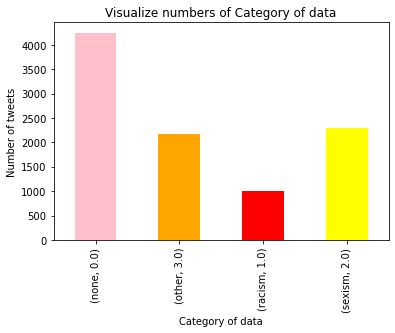

In [12]:
df.groupby('category').label.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.ylabel('Number of tweets')
plt.title("Visualize numbers of Category of data")
plt.savefig('D:\Programming\BE PROJECT\datasets\\foo.png')
plt.show()

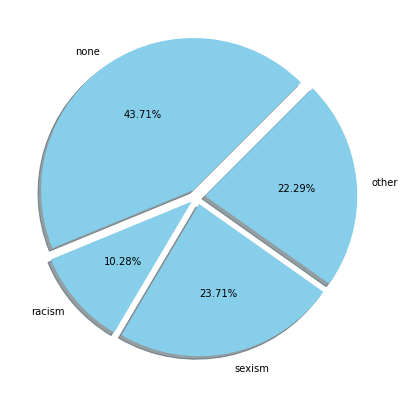

In [13]:
fig = plt.figure(figsize = (10,7))
colors = ["skyblue"]
none = df[df['label'] == 0 ]
racism = df[df['label'] == 1 ]
sexism = df[df['label'] == 2]
other = df[df['label'] == 3]
count = [none['label'].count(), racism['label'].count(), sexism['label'].count(), other['label'].count()]
pie = plt.pie(count, labels = ['none', 'racism', 'sexism', 'other'],
              autopct = "%1.2f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode= (0.05, 0.05, 0.05, 0.05)
             )

In [14]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

none = []
racism = []
sexism = []
other = []

for index_label, row_series in df.iterrows():
    
    if df.at[index_label, 'label'] == 0:
        
        none.append(df.at[index_label, 'tweet'])
    
      
    if df.at[index_label, 'label'] == 1:
        
        racism.append(df.at[index_label, 'tweet'])
        
          
    if df.at[index_label, 'label'] == 2:
        
        sexism.append(df.at[index_label, 'tweet'])
          
    if df.at[index_label, 'label'] == 3:
        
        other.append(df.at[index_label, 'tweet'])
        

def wordcloud_draw(dataset, category, color = 'white'):

    words = ' '.join(dataset)

    cleaned_word = ' '.join([word for word in words.split()])

    wordcloud = WordCloud(stopwords = stop,

    background_color = color,

    width = 1600, height = 800).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    
    if category == 'none' :
        
        print('Non Bullying tweets: ')
    
    elif category == 'other':
        
        print('Hate speech realted tweets: ')
    
    else:
        
        print(category + " " + "related tweets : ")
    
    plt.show()



Non Bullying tweets: 


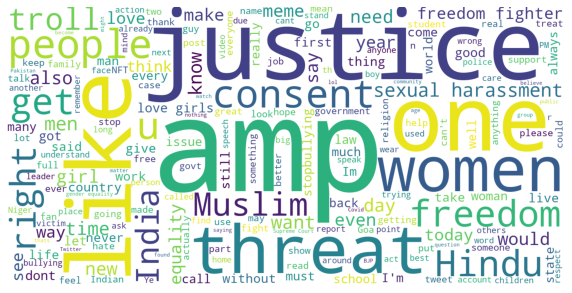

In [46]:
wordcloud_draw(none, 'none')

racism related tweets : 


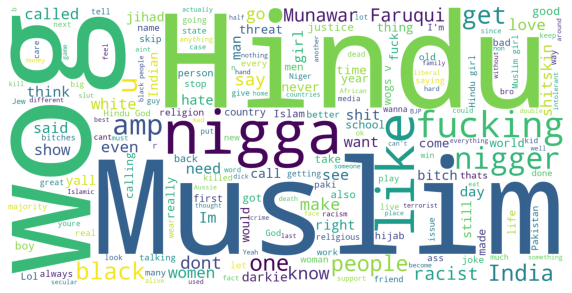

In [47]:
wordcloud_draw(racism, 'racism')

sexism related tweets : 


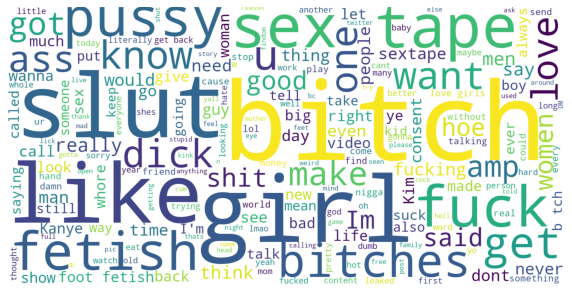

In [48]:
wordcloud_draw(sexism, 'sexism')

Hate speech realted tweets: 


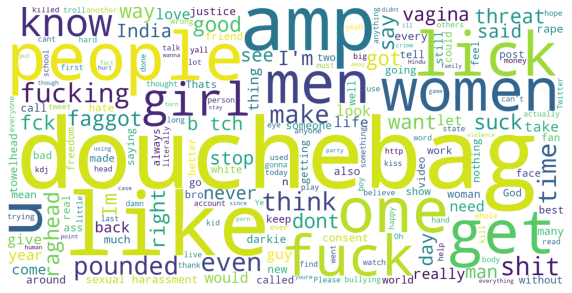

In [49]:
wordcloud_draw(other, 'other')

In [15]:
X = df['tweet']
y = df['category']
print(len(X))
print(len(y))

9716
9716


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(max_features= 5000)
X = tfv.fit_transform(df.tweet).toarray()
y = np.array(df.category.values)

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (9716, 5000)
y.shape =  (9716,)


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)
print(len(x_train))
print(len(x_test))

7772
1944


In [18]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
y_train

array(['racism', 'none', 'none', ..., 'none', 'sexism', 'none'],
      dtype=object)

In [21]:
y_test

array(['racism', 'sexism', 'racism', ..., 'sexism', 'none', 'sexism'],
      dtype=object)

In [22]:
#create list of model and accuracy dicts
perform_list = [ ]

In [23]:
def run_model(model_name, est_c, est_pnlty):

    mdl= ""


    if model_name == 'Random Forest':

        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy')

    elif model_name == 'Multinomial Naive Bayes':

        mdl = MultinomialNB(alpha=1.0, fit_prior=True)
        
    


    elif model_name == 'Support Vector Classifer':

        mdl = SVC()




    elif model_name == 'Decision Tree Classifier':

        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':

        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    
    elif model_name == "Logistic Regression":
        mdl = LogisticRegression(max_iter=1000)
    
    

    oneVsRest = OneVsRestClassifier(mdl)

    oneVsRest.fit(x_train, y_train)

    y_pred = oneVsRest.predict(x_test)

    # Performance metrics

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores

    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: {accuracy} %')

    print(f'Precision : {precision}')

    print(f'Recall : {recall}')

    print(f'F1-score : {f1score}')

    # Add performance parameters to list

    perform_list.append(dict([

    ('Model', model_name),

    ('Test Accuracy', round(accuracy, 2)),

    ('Precision', round(precision, 2)),

    ('Recall', round(recall, 2)),

    ('F1', round(f1score, 2))

    ]))

In [24]:
begin = time.time()
run_model('Logistic Regression', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Logistic Regression: 74.28 %
Precision : 0.742798353909465
Recall : 0.742798353909465
F1-score : 0.742798353909465
Time taken:  10.033370018005371


In [25]:
begin = time.time()
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Multinomial Naive Bayes: 69.44 %
Precision : 0.6944444444444444
Recall : 0.6944444444444444
F1-score : 0.6944444444444444
Time taken:  0.8264169692993164


In [ ]:
begin = time.time()
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

In [182]:
begin = time.time()
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

KeyboardInterrupt: 

In [31]:
begin = time.time()
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)
end = time.time()

print("Time taken: ",end - begin)

Test Accuracy Score of Basic Decision Tree Classifier: 71.84 %
Precision : 0.7183794466403162
Recall : 0.7183794466403162
F1-score : 0.7183794466403162
Time taken:  192.636403799057


In [26]:
begin = time.time()
run_model('Random Forest', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Random Forest: 77.47 %
Precision : 0.7746913580246914
Recall : 0.7746913580246914
F1-score : 0.7746913580246914
Time taken:  157.34466004371643


In [28]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,74.28,0.74,0.74,0.74
1,Multinomial Naive Bayes,69.44,0.69,0.69,0.69
2,Random Forest,77.47,0.77,0.77,0.77


In [30]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value, "%")


The best accuracy of model is 79.22 %


In [40]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' ).fit(x_train, y_train)
classifier
# y_pred = classifier.predict(x_test)
# y_pred

RandomForestClassifier(criterion='entropy')

In [32]:
# save the model to disk

import joblib
vectorizer_filename= 'D:\Programming\BE PROJECT\\vectorizer.pkl'
model_filename  = 'D:\Programming\BE PROJECT\\model.pkl'

vectorizer = joblib.dump(tfv, vectorizer_filename, compress = 3) # save vectorizer
loaded_vectorizer = joblib.load(vectorizer_filename) # load vectorizer


model = joblib.dump(classifier, model_filename, compress = 3) # save model
loaded_model = joblib.load(model_filename) # load model


In [87]:
# Data fetching
#!pip3 install git+https://github.com/Museum-Barberini/twint.git@fix/RefreshTokenException#egg=twint
import nest_asyncio
nest_asyncio.apply()
import twint, time

try:

    c = twint.Config()
    
#     c.Username = input("Enter the username : ")

    c.Search = input("Enter the topic you want to search : ")

    c.Lang = "en"


#     c.Near = "India"
    
    c.Limit = 100

    c.Min_Likes = 100

    c.Store_csv = True       # store tweets in a csv file


    c.Output = "D:/Programming/BE PROJECT/test_tweets/" +c.Search + ".csv"      # path to csv file

    twint.run.Search(c)

except Exception as e:
    print(e)
  

Enter the topic you want to search : slut
1501432245369946112 2022-03-09 11:08:37 +0530 <CbazzThaGreat> I’m a Fuckin slut for Finding new dope music.
1501432243411202049 2022-03-09 11:08:36 +0530 <AngelBawdy> Wasting my talents on pinky come fuck my throat pls 😌( I may look like a little slut tonight but I feel like spamming so go beat ya dicks 🥰)  https://t.co/xXrTtbWfk0
1501432242823913476 2022-03-09 11:08:36 +0530 <LoboCDMX69> @slut_sw Woooow estaría increíble conocerlos 😈😈😈
1501432207214198786 2022-03-09 11:08:28 +0530 <jarjarsmutbot> Jar Jar wants to rub Jabba the Slut's lips gently
1501432126109253632 2022-03-09 11:08:08 +0530 <DaReal_Miaa> You’re a fucking slut, you’re a slut!! 🤣🤣
1501432054654898176 2022-03-09 11:07:51 +0530 <QiDarkness> @CHURLEDCRYOSLUT typical noble sluts  https://t.co/gvZcnWmlve
1501432040021008384 2022-03-09 11:07:48 +0530 <Brilabelle1> @_Famousdeb Translation: a slut
1501431986673500162 2022-03-09 11:07:35 +0530 <comicguy86> @euphoria_slut @MariaKarin17
15

In [88]:
# Data import
import pandas as pd

df1 = pd.read_csv( "D:/Programming/BE PROJECT/test_tweets/" + c.Search + ".csv", error_bad_lines= False)

print(len(df1['tweet']))

df1['tweet']


113


0          I’m a Fuckin slut for Finding new dope music.
1      Wasting my talents on pinky come fuck my throa...
2       @slut_sw Woooow estaría increíble conocerlos 😈😈😈
3      Jar Jar wants to rub Jabba the Slut's lips gently
4              You’re a fucking slut, you’re a slut!! 🤣🤣
                             ...                        
108    @MyCorruptionArc I am here to slut honor every...
109    18 mars är "nödhjälpen" slut. Då blir det ett ...
110    Just Sold Another of my Favorite Items on IWC!...
111    Du var mitt lyckliga slut Det var bara det att...
112    @assboobs_girls @_porn_underwater_emo_sluts_bl...
Name: tweet, Length: 113, dtype: object

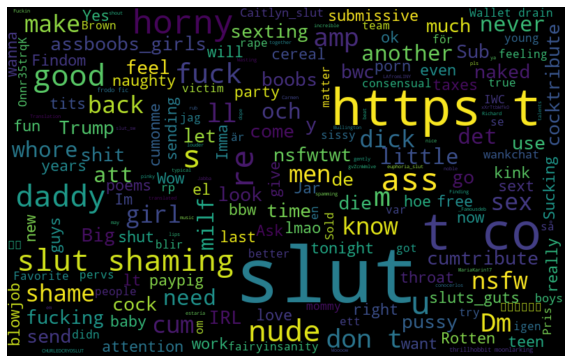

In [89]:
# world cloud to see frequent words in tweets.

all_words = ' '.join([text for text in df1['tweet']])

from wordcloud import WordCloud

import matplotlib.pyplot as plt 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)


plt.figure(figsize=(10, 7))

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis('off')

plt.show()


In [90]:
# preprocessing and removing  non english tweets

import preprocessor as p

from langdetect import detect 

def preprocess(input_txt):
    
    try:
        if detect(input_txt) == 'en':
            pattern = "[^@[\w]+]| [a-zA-Z]+"
            result = ''.join(re.findall(pattern, input_txt))
            return result

    except Exception as e:
        print(e)

In [91]:
# clean the tweets and remove non-english tweets

df1['tweet'] = np.vectorize(preprocess)(df1['tweet'].astype(str))

No features in text.
No features in text.


In [92]:
print(df1['tweet'].head())
df1['tweet'].replace('None', np.nan, inplace=True)
print("\nLength before deleting: ", len(df1))
df1.dropna(subset=['tweet'], how ='all', inplace = True)
df1 = df1.reset_index()
print("Length after deleting: ", len(df1))
print("Empty values: ", df1.tweet.isnull().sum())


0             a Fuckin slut for Finding new dope music
1     my talents on pinky come fuck my throat pls I...
2                                                 None
3          Jar wants to rub Jabba the Slut lips gently
4                            a fucking slut you a slut
Name: tweet, dtype: object

Length before deleting:  113
Length after deleting:  81
Empty values:  0


In [93]:
df1['tweet'].head()

0             a Fuckin slut for Finding new dope music
1     my talents on pinky come fuck my throat pls I...
2          Jar wants to rub Jabba the Slut lips gently
3                            a fucking slut you a slut
4                            typical noble sluts https
Name: tweet, dtype: object

In [94]:
lemmatizer = WordNetLemmatizer()

In [95]:
tweets = []
for i in df1['tweet']:
    tweets.append(i)
tweets

[' a Fuckin slut for Finding new dope music',
 ' my talents on pinky come fuck my throat pls I may look like a little slut tonight but I feel like spamming so go beat ya dicks https',
 ' Jar wants to rub Jabba the Slut lips gently',
 ' a fucking slut you a slut',
 ' typical noble sluts https',
 ' Translation a slut',
 ' Very nice',
 ' together shout once more louder slut give my poems back Give back rotten slut the poems from Carmen translated by Richard Bullington',
 ' my response cld get me banned so I settle for will see you there slut Bc you don know other men',
 ' Wow',
 ' in for dinner but what to get I haven had much of an apatite recently and don really feel like food now but all I had today is cereal If my slut hadn bought me cereal I wouldn have eaten anything Subs are amazing',
 ' not shaming real bitches make money you doing it for free',
 ' Nothing worse and it takes time and work for them to even get a tampon in There a happy medium between the virgin and a slut',
 ' me I

In [96]:
corpus = []
for i in range(len(tweets)):
    tweet = re.sub('[^a-zA-Z]', ' ', tweets[i])
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [lemmatizer.lemmatize(word) for word in tweet if word not in stopwords.words('english')]
    tweet = " ".join(tweet)
    corpus.append(tweet)

for i in corpus:
    print(i)

fuckin slut finding new dope music
talent pinky come fuck throat pls may look like little slut tonight feel like spamming go beat ya dick http
jar want rub jabba slut lip gently
fucking slut slut
typical noble slut http
translation slut
nice
together shout louder slut give poem back give back rotten slut poem carmen translated richard bullington
response cld get banned settle see slut bc know men
wow
dinner get much apatite recently really feel like food today cereal slut bought cereal eaten anything sub amazing
shaming real bitch make money free
nothing worse take time work even get tampon happy medium virgin slut
show aunt want tribute know using as slut lmao
beach day http
well done good slut
slut shaming original
fucking utterly useless holy fuck die already fucking worthless slut die tl

mhhh let undressed u make u little slut
heel forced onto girl throat soft smirk increasing pressure applied die use last breath either embrace much slut use
wanna slut universe side
english uneduc

In [97]:
y_pred1 = tfv.transform(corpus)

prediction = classifier.predict(y_pred1)


for i in range(len(prediction)):
    print("\n" + '['  + str(i+1) + ']'  + "  "  + df1['tweet'][i] + "  "  + '[' + prediction[i] + ']')
   




[1]   a Fuckin slut for Finding new dope music  [sexism]

[2]   my talents on pinky come fuck my throat pls I may look like a little slut tonight but I feel like spamming so go beat ya dicks https  [sexism]

[3]   Jar wants to rub Jabba the Slut lips gently  [sexism]

[4]   a fucking slut you a slut  [sexism]

[5]   typical noble sluts https  [sexism]

[6]   Translation a slut  [sexism]

[7]   Very nice  [none]

[8]   together shout once more louder slut give my poems back Give back rotten slut the poems from Carmen translated by Richard Bullington  [sexism]

[9]   my response cld get me banned so I settle for will see you there slut Bc you don know other men  [sexism]

[10]   Wow  [none]

[11]   in for dinner but what to get I haven had much of an apatite recently and don really feel like food now but all I had today is cereal If my slut hadn bought me cereal I wouldn have eaten anything Subs are amazing  [sexism]

[12]   not shaming real bitches make money you doing it for free  [se

In [86]:
# import necessary libraries 
import easyocr
import joblib


In [68]:
def imgtotext(links):
    
    
    reader = easyocr.Reader(['en'], gpu = False)
    
    for link in links:
        
        result = reader.readtext(link, paragraph='False', detail  = 0)
    
    corpus = []
    
    for i in range(len(result)):
        tweet = re.sub('[^a-zA-Z]', ' ', result[i])
        tweet = tweet.lower()
        tweet = tweet.split()
        tweet = [lemmatizer.lemmatize(word) for word in tweet if word not in stopwords.words('english')]
        tweet = " ".join(tweet)
        corpus.append(tweet)

    text  = " "
    text = text.join(corpus)
    
    
    vectorizer_filename= 'D:\Programming\BE PROJECT\\vectorizer.pkl'
    model_filename  = 'D:\Programming\BE PROJECT\\model.pkl'
    
    loaded_vectorizer = joblib.load(vectorizer_filename) # load vectorizer
    loaded_model = joblib.load(model_filename) # load model

    text_transformed = loaded_vectorizer.transform([text])

    print(text)
    return loaded_model.predict(text_transformed)




    

In [69]:
for i in range(len(df1)):
    
    if len(df1['photos'][i]) > 2:
        text = df1['photos'][i]
        pattern = "https:[^']+"
        links = re.findall(pattern, text)
        print(imgtotext(links))


['none']



['none']



['none']


ju tmthe guy love joe biden mdlirts fo xcartold war vetcran duto un joseph robinettebiden jr  iqe maha iks io scnd stinahn mrutuniay chk ioliday mantra recount findj time good news biden imissing vote joe biden georeia fack check forgave ame meaning student debt e biden got senate ar ago bldoen mockedforckuiminghe usedlo drive wheeler truck nsnes com stalt september llseam edi mcricins upactedby htell bidn xot comc cnonal
['none']



['none']



['none']



['none']



['none']



['none']
ju tmthe guy love joe biden mdlirts fo xcartold war vetcran duto un joseph robinettebiden jr  iqe maha iks io scnd stinahn mrutuniay chk ioliday mantra recount findj time good news biden imissing vote joe biden georeia fack check forgave ame meaning student debt e biden got senate ar ago bldoen mockedforckuiminghe usedlo drive wheeler truck nsnes com stalt september llseam edi mcricins upactedby htell bidn xot comc cnonal
['none']
